In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from google.colab import drive
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.svm import SVR

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


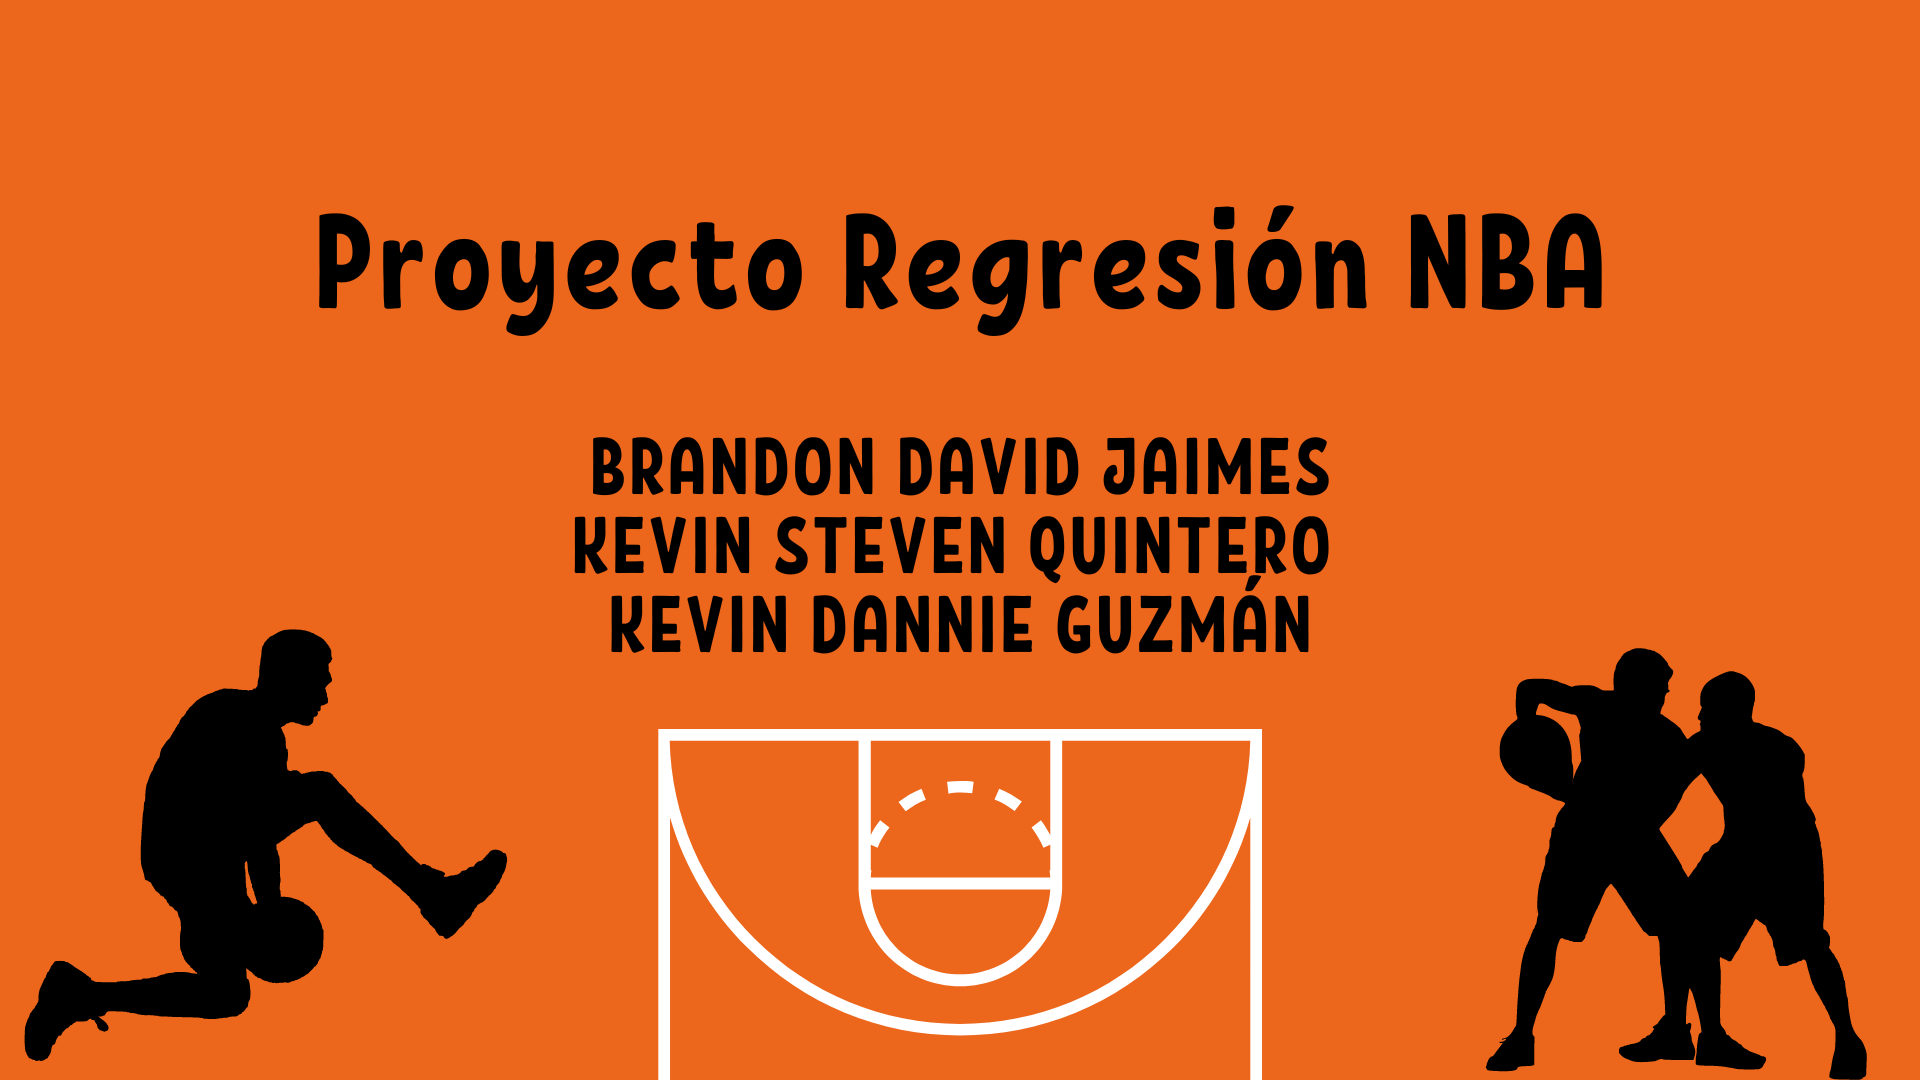

In [ ]:
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/Images-IA/nombres.png'))

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_set_basket=pd.read_csv('https://raw.githubusercontent.com/Fitman22/NBA_Regresion/refs/heads/main/game.csv')
#print(data_set_basket.isnull().sum())

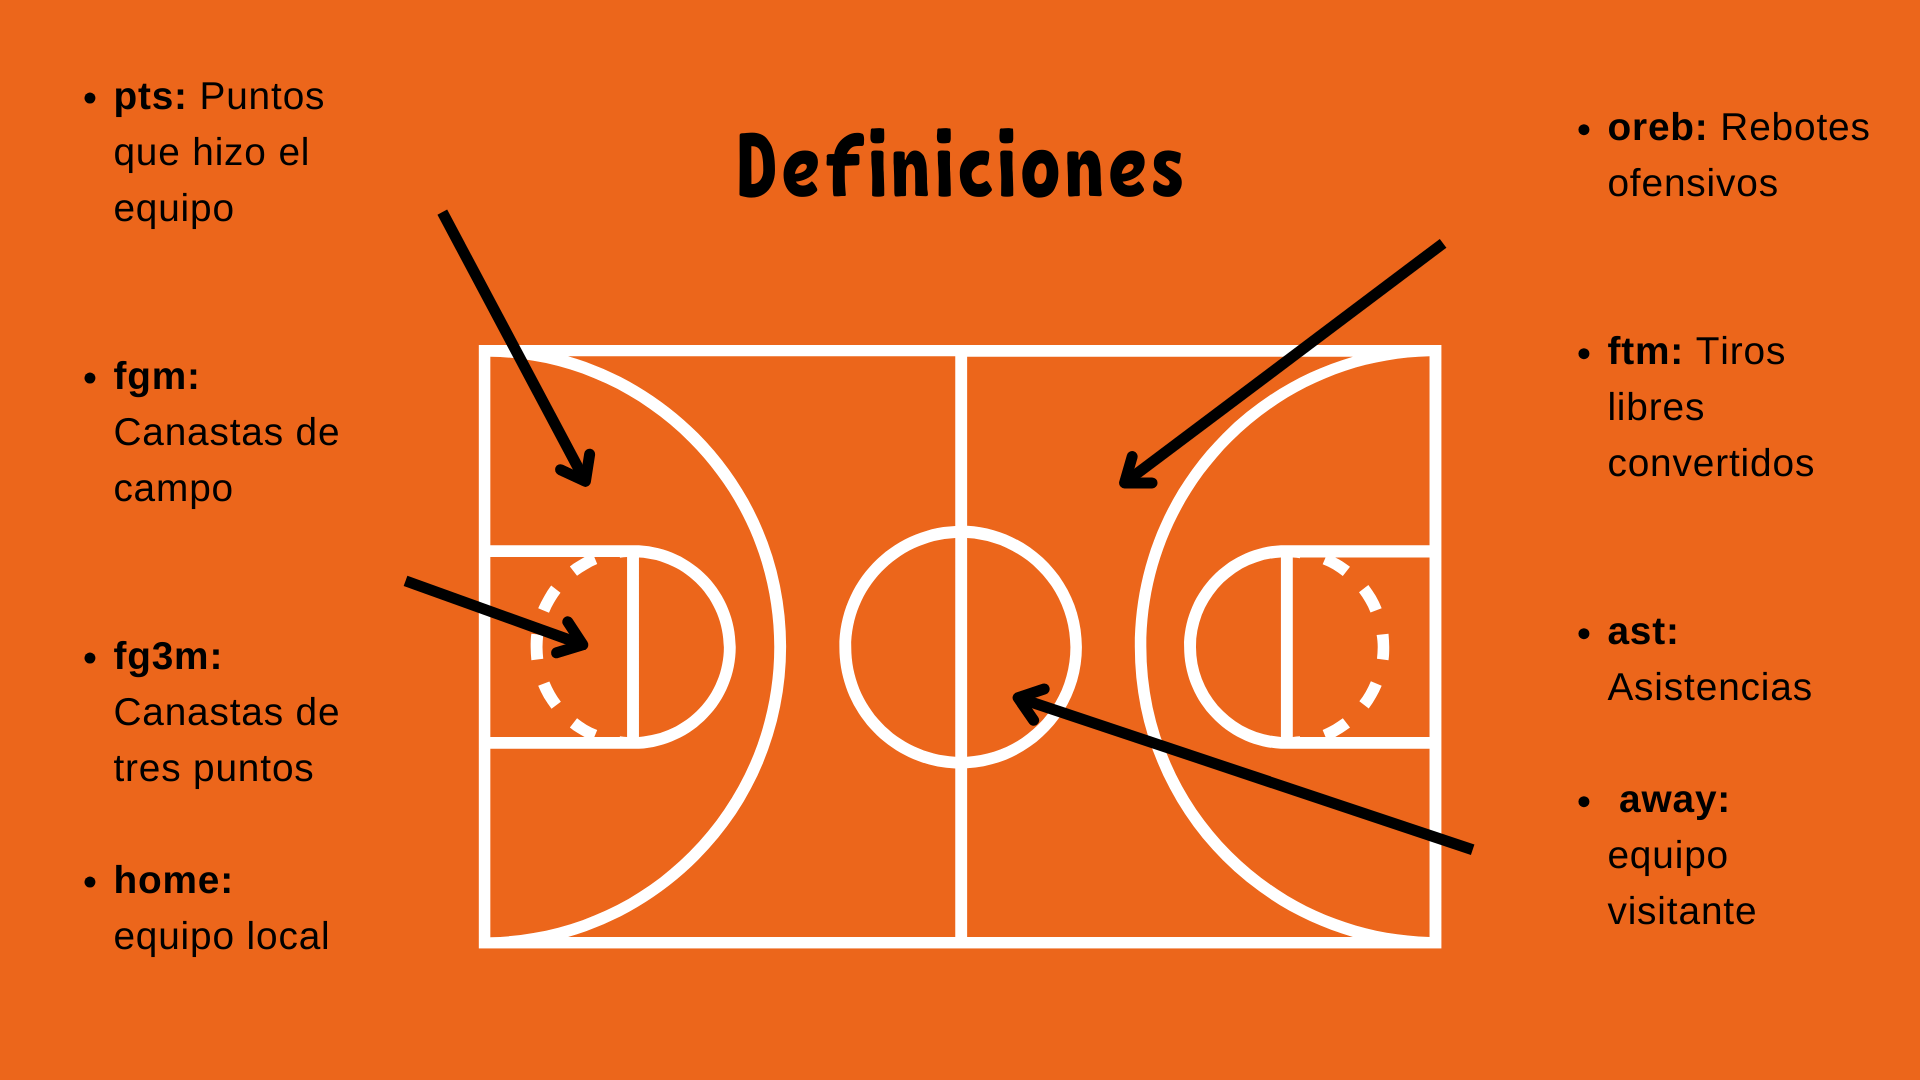

In [ ]:
display(Image('/content/drive/MyDrive/Images-IA/def.png'))

In [ ]:
#df = data_set_basket[["game_id", "season_id"]]
data_set_basket_filtrado = data_set_basket[["team_name_home", "pts_home", "fgm_home", "fg3m_home", "oreb_home", "ftm_home", "ast_home",
                                            "team_name_away", "pts_away", "fgm_away", "fg3m_away", "oreb_away", "ftm_away", "ast_away"]]
data_set_basket_filtrado = data_set_basket_filtrado.dropna()
data_set_basket_filtrado.describe()
data_set_basket_filtrado.shape

(46718, 14)

In [ ]:
data_set_basket_filtrado.head(10)

,team_name_home,pts_home,fgm_home,fg3m_home,oreb_home,ftm_home,ast_home,team_name_away,pts_away,fgm_away,fg3m_away,oreb_away,ftm_away,ast_away
14165,Los Angeles Lakers,109.0,48.0,0.0,12.0,13.0,30.0,Philadelphia 76ers,102.0,40.0,0.0,14.0,22.0,28.0
14166,Los Angeles Lakers,104.0,48.0,0.0,15.0,8.0,32.0,Philadelphia 76ers,107.0,43.0,0.0,5.0,21.0,34.0
14167,Philadelphia 76ers,101.0,45.0,1.0,13.0,10.0,34.0,Los Angeles Lakers,111.0,44.0,0.0,22.0,23.0,20.0
14168,Philadelphia 76ers,105.0,41.0,0.0,5.0,23.0,31.0,Los Angeles Lakers,102.0,44.0,0.0,18.0,14.0,23.0
14169,Los Angeles Lakers,108.0,41.0,0.0,19.0,26.0,28.0,Philadelphia 76ers,103.0,42.0,0.0,13.0,19.0,32.0
14170,Philadelphia 76ers,107.0,47.0,0.0,7.0,13.0,27.0,Los Angeles Lakers,123.0,45.0,0.0,17.0,33.0,27.0
14171,East NBA All Stars East,144.0,58.0,1.0,31.0,27.0,34.0,West NBA All Stars West,136.0,53.0,0.0,24.0,30.0,34.0
14172,East NBA All Stars East,144.0,58.0,1.0,31.0,27.0,34.0,West NBA All Stars West,136.0,53.0,0.0,24.0,30.0,34.0
15163,Boston Celtics,98.0,41.0,0.0,25.0,16.0,23.0,Houston Rockets,95.0,42.0,0.0,19.0,11.0,23.0
15164,Boston Celtics,90.0,41.0,0.0,14.0,8.0,17.0,Houston Rockets,92.0,34.0,2.0,13.0,22.0,16.0


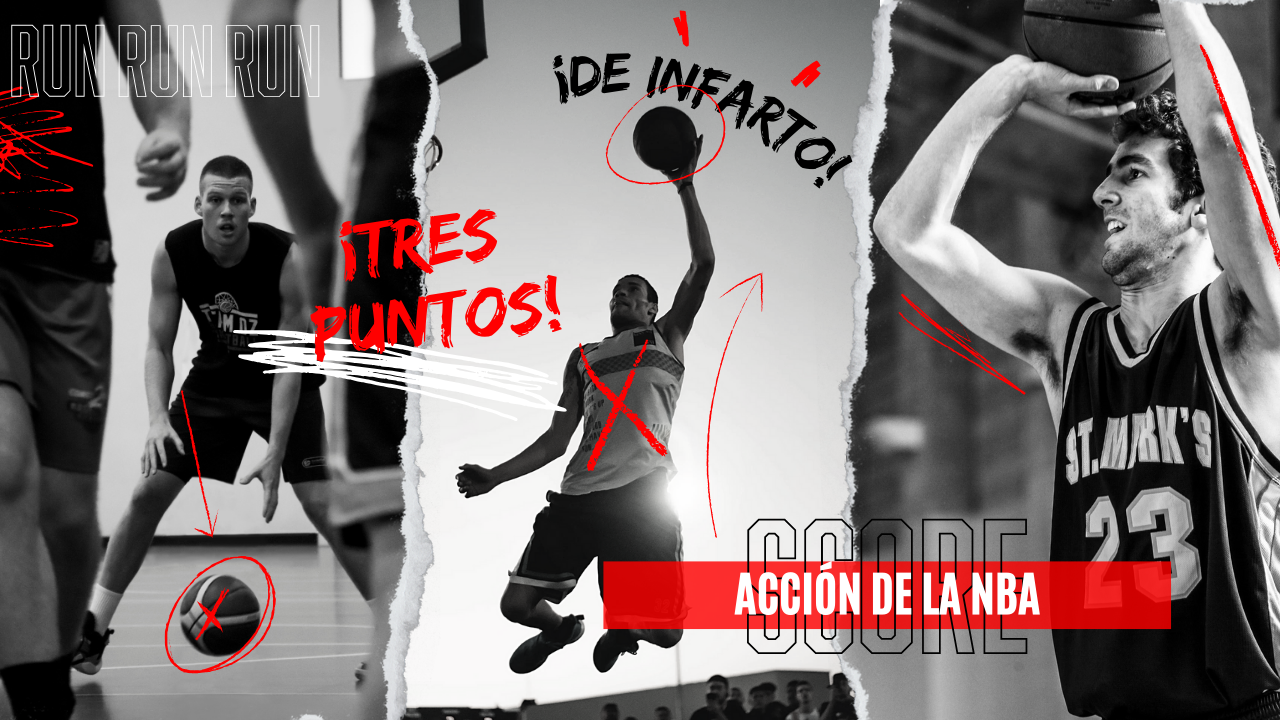

In [ ]:
display(Image('/content/drive/MyDrive/Images-IA/miniatura.png'))

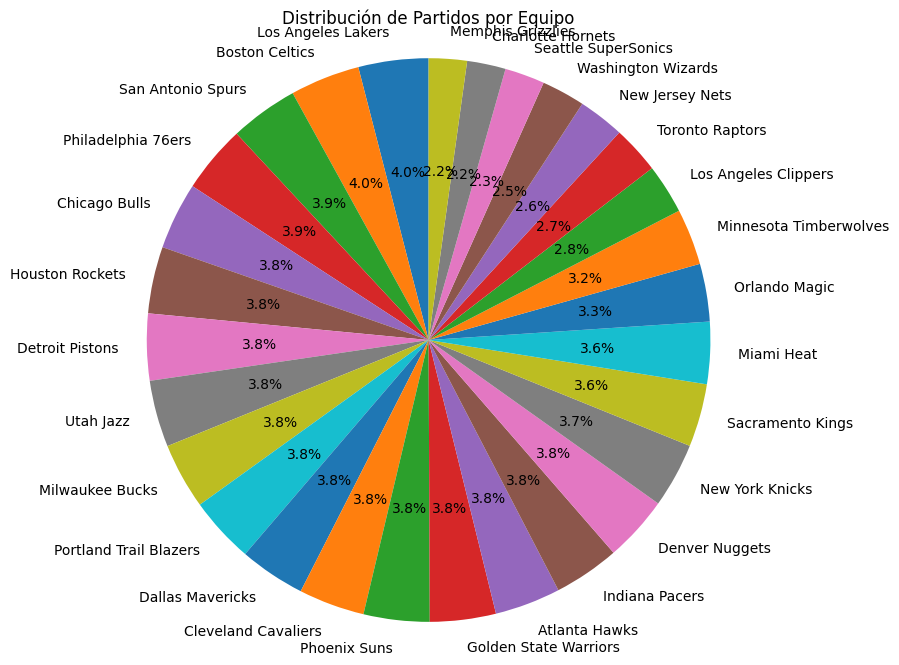

In [ ]:
local = data_set_basket_filtrado['team_name_home']
visitante = data_set_basket_filtrado['team_name_away']
conteo_equipos = pd.concat([local, visitante]).value_counts()
conteo_equipos_filtrado = conteo_equipos[conteo_equipos > 1500]

plt.figure(figsize=(8,8))
plt.pie(conteo_equipos_filtrado, labels=conteo_equipos_filtrado.index, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('Distribución de Partidos por Equipo')
plt.show()

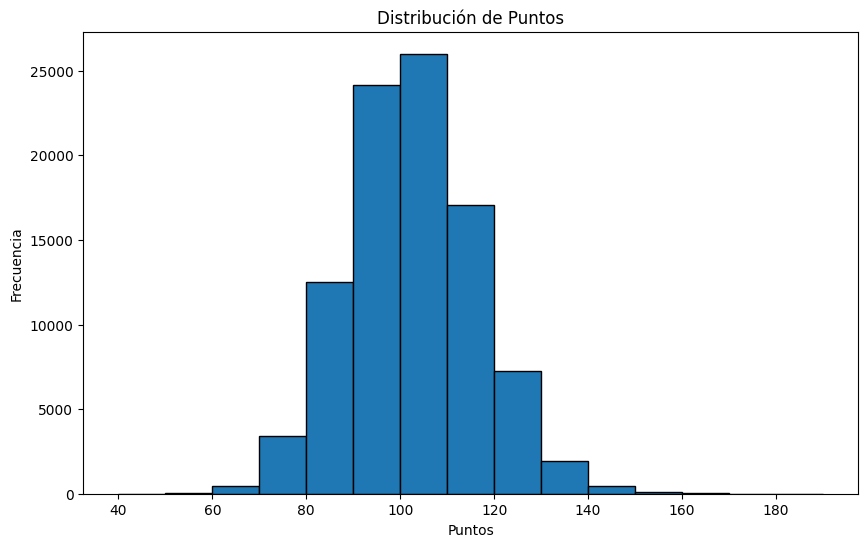

In [ ]:
puntos_local = data_set_basket_filtrado['pts_home']
puntos_visitante = data_set_basket_filtrado['pts_away']

puntos_totales = pd.concat([puntos_local, puntos_visitante])

bins = range(40, 200, 10)

plt.figure(figsize=(10,6))
plt.hist(puntos_totales, bins=bins, edgecolor='black')

plt.xlabel('Puntos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntos')
plt.show()

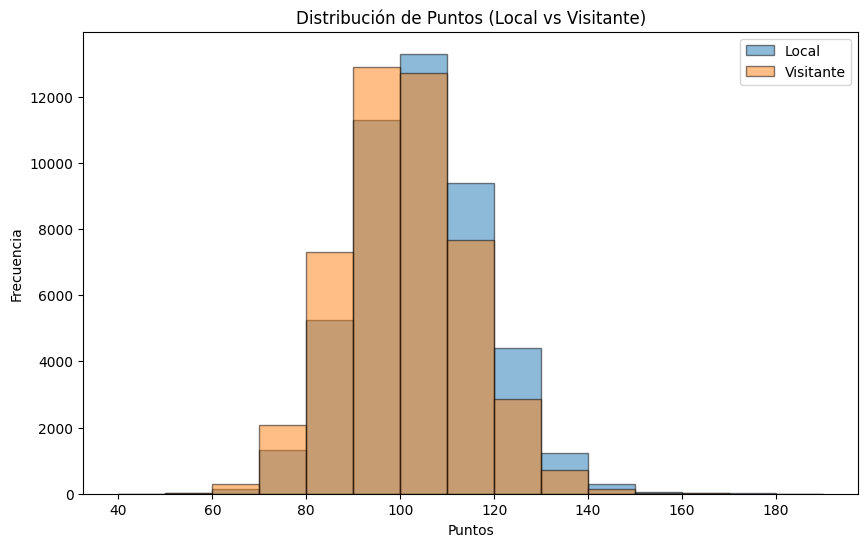

In [ ]:
puntos_local_separado = data_set_basket_filtrado['pts_home']
puntos_visitante_separado = data_set_basket_filtrado['pts_away']

bins = range(40, 200, 10)


plt.figure(figsize=(10,6))
plt.hist(puntos_local_separado, bins=bins, alpha=0.5, label='Local', edgecolor='black')
plt.hist(puntos_visitante_separado, bins=bins, alpha=0.5, label='Visitante', edgecolor='black')

plt.title('Distribución de Puntos (Local vs Visitante)')
plt.xlabel('Puntos')
plt.ylabel('Frecuencia')

plt.legend()
plt.show()

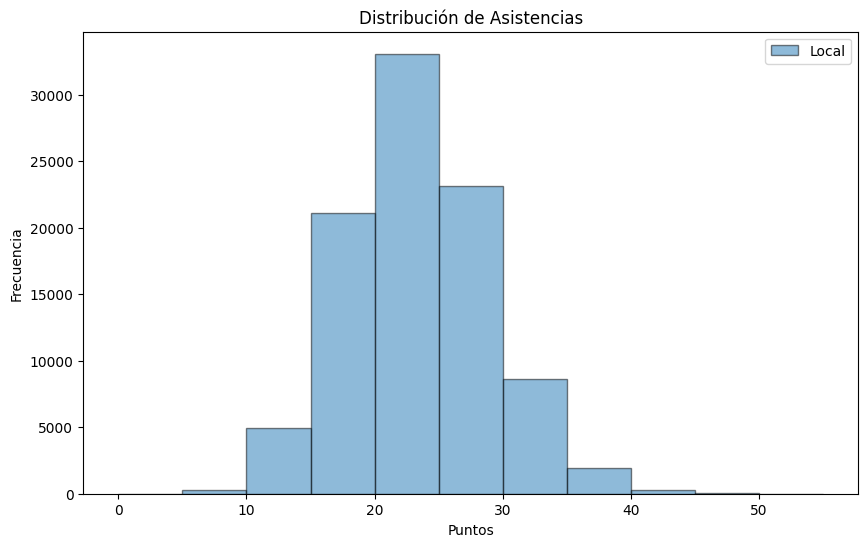

In [ ]:
asistencias_local = data_set_basket_filtrado['ast_home']
asistencias_visitante = data_set_basket_filtrado['ast_away']

asistencias_totales_separado = pd.concat([asistencias_local, asistencias_visitante])


bins = range(0, 60, 5)


plt.figure(figsize=(10,6))
plt.hist(asistencias_totales_separado, bins=bins, alpha=0.5, label='Local', edgecolor='black')

plt.title('Distribución de Asistencias')
plt.xlabel('Puntos')
plt.ylabel('Frecuencia')

plt.legend()
plt.show()

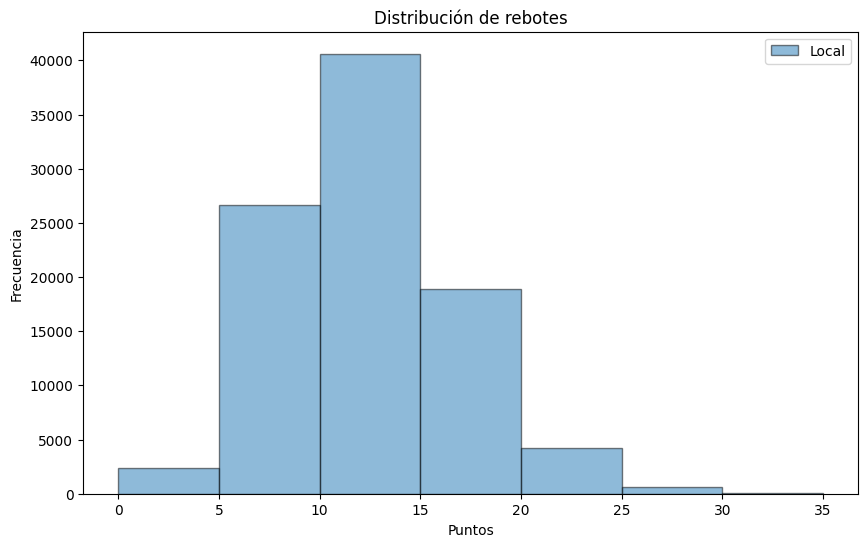

In [ ]:

rebotes_local = data_set_basket_filtrado['oreb_home']
rebotes_visitante = data_set_basket_filtrado['oreb_away']

rebotes = pd.concat([rebotes_local, rebotes_visitante])


bins = range(0, 40, 5)


plt.figure(figsize=(10,6))
plt.hist(rebotes, bins=bins, alpha=0.5, label='Local', edgecolor='black')

plt.title('Distribución de rebotes')
plt.xlabel('Puntos')
plt.ylabel('Frecuencia')

plt.legend()
plt.show()

In [ ]:
# Seleccionamos las columnas correspondientes a los datos del equipo local
local_data = data_set_basket_filtrado[["team_name_home", "pts_home", "fgm_home", "fg3m_home", "oreb_home", "ftm_home", "ast_home"]]

# Seleccionamos las columnas correspondientes a los datos del equipo visitante
visitor_data = data_set_basket_filtrado[["team_name_away", "pts_away", "fgm_away", "fg3m_away", "oreb_away", "ftm_away", "ast_away"]]

#Local
local_data = local_data.drop("team_name_home", axis=1)
visitor_data = visitor_data.drop("team_name_away", axis=1)

X_local = local_data.drop("pts_home", axis=1)
y_local = local_data['pts_home']

#Visitante
X_visitante = visitor_data.drop("pts_away", axis=1)
y_visitante = visitor_data['pts_away']

In [ ]:
#DecisionTree

X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(X_local, y_local, test_size=0.20, random_state=21)

dt_model = DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, splitter='best')
dt_model.fit(X_train_local, y_train_local)
y_pred = dt_model.predict(X_test_local)

mae_dt_local = mean_absolute_error(y_test_local, y_pred)
mse_dt_local = mean_squared_error(y_test_local, y_pred)
rmse_dt_local = np.sqrt(mse_dt_local)

print("DecisionTree Local")
print("MAE:", mae_dt_local)
print("MSE:", mse_dt_local)
print("RMSE:", rmse_dt_local)

#Random Forest

model_local = RandomForestRegressor(n_estimators=10)
model_local.fit(X_train_local, y_train_local)
y_pred_rf_local = model_local.predict(X_test_local)
score1_rf_local = mean_squared_error(y_test_local, y_pred_rf_local)
score2_rf_local = cross_val_score(model_local, X_local, y_local, cv=3, scoring=make_scorer(mean_squared_error))

print("\nRandom Forest Local")
print("MSE:", score1_rf_local)
print("Score:", score2_rf_local)

# SVR
est = SVR(kernel='poly')
est.fit(X_train_local, y_train_local)
y_pred2_svr_local = est.predict(X_test_local)
score2_svr_local = mean_absolute_error(y_test_local, y_pred2_svr_local)


print("\nSVR Local")
print("MAE:", score2_svr_local)


DecisionTree Local
MAE: 5.1046442049113905
MSE: 41.79621352916505
RMSE: 6.464999112851064

Random Forest Local
MSE: 0.3553938356164384
Score: [2.56790535 0.39291017 2.85184755]

SVR Local
MAE: 1.4956579511851629


In [ ]:

#Visitante
#DecisionTree

X_train_visitante, X_test_visitante, y_train_visitante, y_test_visitante = train_test_split(X_visitante, y_visitante, test_size=0.15, random_state=21)

dt_model_dt_visitante = DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, splitter='best')
dt_model_dt_visitante.fit(X_train_visitante, y_train_visitante)
y_pred_dt_visitante = dt_model_dt_visitante.predict(X_test_visitante)

mae_dt_visitante = mean_absolute_error(y_test_visitante, y_pred_dt_visitante)
mse_dt_visitante = mean_squared_error(y_test_visitante, y_pred_dt_visitante)
rmse_dt_visitante = np.sqrt(mse_dt_visitante)

print("\nDecisionTree Visitante")
print("MAE:", mae_dt_visitante)
print("MSE:", mse_dt_visitante)
print("RMSE:", rmse_dt_visitante)

model_rf_visitante = RandomForestRegressor(n_estimators=10)
model_rf_visitante.fit(X_train_visitante, y_train_visitante)
y_pred_rf_visitante = model_rf_visitante.predict(X_test_visitante)
score1_rf_visitante = mean_squared_error(y_test_visitante, y_pred_rf_visitante)
score2_rf_visitante = cross_val_score(model_rf_visitante, X_visitante, y_visitante, cv=3, scoring=make_scorer(mean_squared_error))

print("\nRandom Forest Visitante")
print("MSE:", score1_rf_visitante)
print("Score:", score2_rf_visitante)

# SVR

est = SVR(kernel='poly')
est.fit(X_train_visitante, y_train_visitante)
y_pred2_svr_visitante = est.predict(X_test_visitante)
score2_svr_visitante = mean_absolute_error(y_test_visitante, y_pred2_svr_visitante)

print("\nSVR Visitante")
print("MAE:", score2_svr_visitante)



DecisionTree Visitante
MAE: 4.9602573993759185
MSE: 39.644814887526074
RMSE: 6.296412858725679

Random Forest Visitante
MSE: 0.27164098173515966
Score: [1.77022218 0.35996982 3.25779476]


In [ ]:
# Resultados DecisionTree Local
mae_dt_local = mean_absolute_error(y_test_local, y_pred)
mse_dt_local = mean_squared_error(y_test_local, y_pred)
rmse_dt_local = np.sqrt(mse_dt_local)

# Resultados RandomForest Local
score1_rf_local = mean_squared_error(y_test_local, y_pred_rf_local)
score2_rf_local = cross_val_score(model_local, X_local, y_local, cv=3, scoring=make_scorer(mean_squared_error)).mean()

# Resultados SVR Local
score2_svr_local = mean_absolute_error(y_test_local, y_pred2_svr_local)

# Resultados DecisionTree Visitante
mae_dt_visitor = mean_absolute_error(y_test_visitante, y_pred_dt_visitante)
mse_dt_visitor = mean_squared_error(y_test_visitante, y_pred_dt_visitante)
rmse_dt_visitor = np.sqrt(mse_dt_visitor)

# Resultados RandomForest Visitante
score1_rf_visitor = mean_squared_error(y_test_visitante, y_pred_rf_visitante)
score2_rf_visitor = cross_val_score(model_rf_visitante, X_visitante, y_visitante, cv=3, scoring=make_scorer(mean_squared_error)).mean()

# Resultados SVR Visitante
score2_svr_visitor = mean_absolute_error(y_test_visitante, y_pred2_svr_visitante)

metrics = ['MAE', 'MSE', 'RMSE', 'Score1', 'Score2']
local_values = [mae_dt_local, mse_dt_local, rmse_dt_local, score1_rf_local, score2_rf_local]
visitor_values = [mae_dt_visitor, mse_dt_visitor, rmse_dt_visitor, score1_rf_visitor, score2_rf_visitor]

In [ ]:
def show_plt():
  import matplotlib.pyplot as plt
  metrics_dt_local = ['MAE', 'MSE', 'RMSE']
  values_dt_local = [mae_dt_local, mse_dt_local, rmse_dt_local]

  metrics_dt_visitor = ['MAE', 'MSE', 'RMSE']
  values_dt_visitor = [mae_dt_visitor, mse_dt_visitor, rmse_dt_visitor]

  x = range(len(metrics))
  plt.figure(figsize=(10, 6))
  plt.bar(x, local_values, width=0.4, label='Local', align='center', color='blue')
  plt.bar([i + 0.4 for i in x], visitor_values, width=0.4, label='Visitor', align='center', color='orange')
  plt.xticks([i + 0.2 for i in x], metrics)
  plt.ylabel('Values')
  plt.title('Comparison of Metrics for Local and Visitor Teams')
  plt.legend()
  plt.show()

In [ ]:
show_plt()

In [ ]:
# DecisionTree resultados
metrics_dt_local = ['MAE', 'MSE', 'RMSE']
values_dt_local = [mae_dt_local, mse_dt_local, rmse_dt_local]

metrics_dt_visitor = ['MAE', 'MSE', 'RMSE']
values_dt_visitor = [mae_dt_visitor, mse_dt_visitor, rmse_dt_visitor]
x = np.arange(len(metrics_dt_local))
width = 0.4

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, values_dt_local, width, color='blue', alpha=0.7, label='Local')
plt.bar(x + width/2, values_dt_visitor, width, color='orange', alpha=0.7, label='Visitor')
plt.xticks(x, metrics_dt_local)
plt.title('DecisionTree Metrics')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
# RandomForest resultados
metrics_rf = ['MSE', 'CrossValScore']
values_rf_local = [score1_rf_local, score2_rf_local]
values_rf_visitor = [score1_rf_visitor, score2_rf_visitor]

x = np.arange(len(metrics_rf))

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, values_rf_local, width, color='blue', alpha=0.7, label='Local')
plt.bar(x + width/2, values_rf_visitor, width, color='orange', alpha=0.7, label='Visitor')
plt.xticks(x, metrics_rf)
plt.title('RandomForest Metrics')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
# SVR resultados
metrics_svr = ['MAE']
values_svr_local = [score2_svr_local]
values_svr_visitor = [score2_svr_visitor]

x = np.arange(len(metrics_svr))

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, values_svr_local, width, color='blue', alpha=0.7, label='Local')
plt.bar(x + width/2, values_svr_visitor, width, color='orange', alpha=0.7, label='Visitor')
plt.xticks(x, metrics_svr)
plt.title('SVR Metrics')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
def show_curve(est, X, y, colors):
    means, stds = [], []
    nfolds_range = range(2,10)
    for nfolds in nfolds_range:
        #print (nfolds,)
        dt_model = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(dt_model))
        stds.append(np.std(dt_model))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color=colors, alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()


In [ ]:
#Datos Local
show_curve(DecisionTreeRegressor(), X_local, y_local, "blue")
show_curve(RandomForestRegressor(), X_local, y_local, "green")

In [ ]:
#Datos del local
est = SVR(kernel='poly')
show_curve(est, X_local, y_local, "red")

In [ ]:
#Datos Visitante
show_curve(DecisionTreeRegressor(), X_visitante, y_visitante, "blue")
show_curve(RandomForestRegressor(), X_visitante, y_visitante, "green")

In [ ]:
#Datos Visitante
est = SVR(kernel='poly')
show_curve(est, X_visitante, y_visitante, "red")

**ENTREGA FINAL**

PROYECTO FINAL

In [4]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data_set_basket = pd.read_csv('https://raw.githubusercontent.com/Fitman22/NBA_Regresion/refs/heads/main/game.csv')
# Seleccionamos las columnas correspondientes a los datos del equipo local y visitante
data_set_basket_filtrado = data_set_basket[["team_abbreviation_home", "pts_home", "fgm_home", "fg3m_home", "oreb_home", "ftm_home", "ast_home",
                                            "team_abbreviation_away", "pts_away", "fgm_away", "fg3m_away", "oreb_away", "ftm_away", "ast_away"]]
data_set_basket_filtrado = data_set_basket_filtrado.dropna()
data_set_basket_filtrado.head()

# Local
local_data = data_set_basket_filtrado[["team_abbreviation_home", "pts_home", "fgm_home", "fg3m_home", "oreb_home", "ftm_home", "ast_home"]]
visitor_data = data_set_basket_filtrado[["team_abbreviation_away", "pts_away", "fgm_away", "fg3m_away", "oreb_away", "ftm_away", "ast_away"]]

local_data = local_data.drop("team_abbreviation_home", axis=1)
visitor_data = visitor_data.drop("team_abbreviation_away", axis=1)

X_local = local_data.drop("pts_home", axis=1)
y_local = local_data['pts_home']

X_visitante = visitor_data.drop("pts_away", axis=1)
y_visitante = visitor_data['pts_away']

In [6]:
# Definir el modelo DNN
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_local.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae', metrics=['mae', 'mse'])
history = model.fit(X_local, y_local, epochs=15, batch_size=40, validation_data=(X_visitante, y_visitante), verbose=1)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1168/1168 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5.6093 - mae: 5.6093 - mse: 333.4845 - val_loss: 0.6189 - val_mae: 0.6189 - val_mse: 0.4122
Epoch 2/15
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.8111 - mae: 0.8111 - mse: 1.0582 - val_loss: 0.3249 - val_mae: 0.3249 - val_mse: 0.1293
Epoch 3/15
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.6399 - mae: 0.6399 - mse: 0.7018 - val_loss: 2.1603 - val_mae: 2.1603 - val_mse: 4.7832
Epoch 4/15
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.7215 - mae: 0.7215 - mse: 0.8986 - val_loss: 0.8370 - val_mae: 0.8370 - val_mse: 0.7452
Epoch 5/15
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6877 - mae: 0.6877 - mse: 0.7743 - val_loss: 0.3666 - val_mae: 0.3666 - val_mse: 0.1517
Epoch 6/15
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.5550 - mae: 0.5550 - mse: 0.4777 - val_loss: 0.1382 - val_mae: 0.1382 - val_mse: 0.0349
Epoch 7/15
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.6038 - mae: 0.6038 - mse: 0.6312

In [7]:
# Función para obtener estadísticas de un equipo
def obtener_estadisticas_equipo(equipo, data_set, es_local=True):
    if es_local:
        equipo_data = data_set[data_set['team_abbreviation_home'] == equipo]
        estadisticas = equipo_data[["fgm_home", "fg3m_home", "oreb_home", "ftm_home", "ast_home"]].mean().tolist()
    else:
        equipo_data = data_set[data_set['team_abbreviation_away'] == equipo]
        estadisticas = equipo_data[["fgm_away", "fg3m_away", "oreb_away", "ftm_away", "ast_away"]].mean().tolist()
    return estadisticas


In [8]:

# Función para predecir el resultado de un nuevo partido
def predecir_resultado(equipo_home, equipo_away, data_set):
    # Obtener estadísticas de los equipos
    nuevo_partido_local = obtener_estadisticas_equipo(equipo_home, data_set, es_local=True)
    nuevo_partido_visitante = obtener_estadisticas_equipo(equipo_away, data_set, es_local=False)

    # Realizar la predicción para el equipo local
    prediccion_local = model.predict(np.array([nuevo_partido_local]), verbose=1)

    # Realizar la predicción para el equipo visitante
    prediccion_visitante = model.predict(np.array([nuevo_partido_visitante]), verbose=1)

    # Determinar el equipo ganador basado en los puntos predichos
    puntos_home = prediccion_local[0][0]
    puntos_away = prediccion_visitante[0][0]

    if puntos_home > puntos_away:
        ganador = "Equipo Home"
    else:
        ganador = "Equipo Away"

    return puntos_home, puntos_away, ganador

In [9]:
puntos_home, puntos_away, ganador = predecir_resultado("LAL", "PHL", data_set_basket_filtrado)

print(f"Puntos del equipo Home: {puntos_home}")
print(f"Puntos del equipo Away: {puntos_away}")
print(f"Ganador: {ganador}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Puntos del equipo Home: 107.29292297363281
Puntos del equipo Away: 103.09749603271484
Ganador: Equipo Home


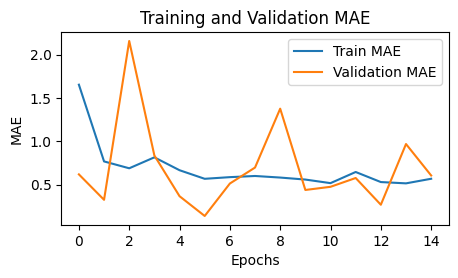

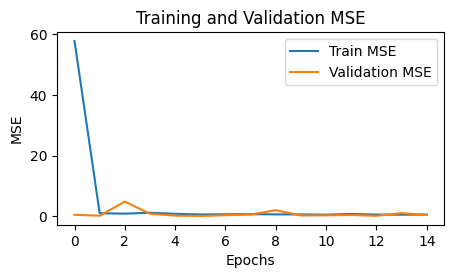

In [10]:
# Gráficos de entrenamiento y validación
plt.figure(figsize=(5, 2.5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

plt.figure(figsize=(5, 2.5))
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.legend()
plt.show()

In [11]:
# Último valor de MAE en entrenamiento
last_train_mae = history.history['mae'][-1]

# Último valor de MAE en validación
last_val_mae = history.history['val_mae'][-1]

print(f"Último MAE en entrenamiento: {last_train_mae}")
print(f"Último MAE en validación: {last_val_mae}")

Último MAE en entrenamiento: 0.5682867765426636
Último MAE en validación: 0.6059592962265015


6 CAPAS OCULTAS


In [ ]:
# Definir el modelo DNN
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_local.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae', metrics=['mae', 'mse'])
history = model.fit(X_local, y_local, epochs=15, batch_size=40, validation_data=(X_visitante, y_visitante), verbose=1)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1168/1168 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 6.2851 - mae: 6.2851 - mse: 259.9376 - val_loss: 4.1613 - val_mae: 4.1613 - val_mse: 17.6721
Epoch 2/15
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 2.4251 - mae: 2.4251 - mse: 10.5728 - val_loss: 2.5761 - val_mae: 2.5761 - val_mse: 6.9238
Epoch 3/15
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 1.9292 - mae: 1.9292 - mse: 6.4078 - val_loss: 1.5362 - val_mae: 1.5362 - val_mse: 2.5371
Epoch 4/15
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 1.7944 - mae: 1.7944 - mse: 5.3849 - val_loss: 2.5319 - val_mae: 2.5319 - val_mse: 6.6555
Epoch 5/15
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 1.6263 - mae: 1.6263 - mse: 4.2227 - val_loss: 0.4220 - val_mae: 0.4220 - val_mse: 0.2431
Epoch 6/15
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 1.2561 - mae: 1.2561 - mse: 2.5663 - val_loss: 3.4202 - val_mae: 3.4202 - val_mse: 12.0181
Epoch 7/15
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 1.7465 - mae: 1.7465 - 

In [ ]:
puntos_home, puntos_away, ganador = predecir_resultado("LAL", "PHL", data_set_basket_filtrado)

print(f"Puntos del equipo Home: {puntos_home}")
print(f"Puntos del equipo Away: {puntos_away}")
print(f"Ganador: {ganador}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Puntos del equipo Home: 109.60246276855469
Puntos del equipo Away: 105.30834197998047
Ganador: Equipo Home


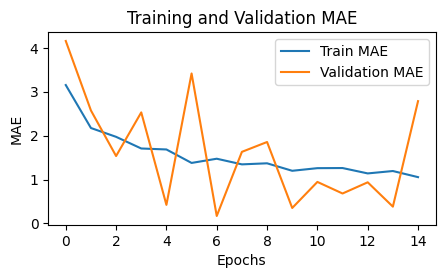

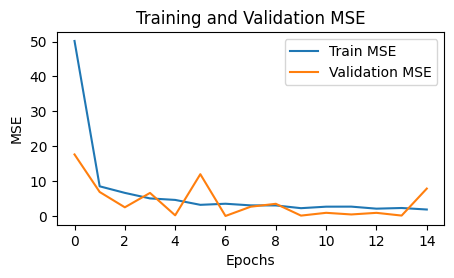

In [ ]:
# Gráficos de entrenamiento y validación
plt.figure(figsize=(5, 2.5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

plt.figure(figsize=(5, 2.5))
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.legend()
plt.show()

In [12]:
# Último valor de MAE en entrenamiento
last_train_mae = history.history['mae'][-1]

# Último valor de MAE en validación
last_val_mae = history.history['val_mae'][-1]

print(f"Último MAE en entrenamiento: {last_train_mae}")
print(f"Último MAE en validación: {last_val_mae}")

Último MAE en entrenamiento: 0.5682867765426636
Último MAE en validación: 0.6059592962265015


10 CAPAS OCULTAS

In [ ]:
# Definir el modelo DNN
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_local.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mae', metrics=['mae', 'mse'])
history = model.fit(X_local, y_local, epochs=15, batch_size=40, validation_data=(X_visitante, y_visitante), verbose=1)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1168/1168 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - loss: 8.6587 - mae: 8.6587 - mse: 326.6475 - val_loss: 10.6317 - val_mae: 10.6317 - val_mse: 116.2382
Epoch 2/15
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - loss: 4.3327 - mae: 4.3327 - mse: 33.6660 - val_loss: 1.7102 - val_mae: 1.7102 - val_mse: 3.0631
Epoch 3/15
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - loss: 3.6294 - mae: 3.6294 - mse: 20.9569 - val_loss: 4.8974 - val_mae: 4.8974 - val_mse: 24.2765
Epoch 4/15
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - loss: 3.4962 - mae: 3.4962 - mse: 23.1751 - val_loss: 2.2817 - val_mae: 2.2817 - val_mse: 5.8190
Epoch 5/15
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - loss: 2.2535 - mae: 2.2535 - mse: 8.4255 - val_loss: 1.4974 - val_mae: 1.4974 - val_mse: 2.3013
Epoch 6/15
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - loss: 2.1127 - mae: 2.1127 - mse: 8.0333 - val_loss: 2.2642 - val_mae: 2.2642 - val_mse: 5.1607
Epoch 7/15
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - loss: 2.1775 - mae:

In [ ]:
puntos_home, puntos_away, ganador = predecir_resultado("LAL", "PHL", data_set_basket_filtrado)

print(f"Puntos del equipo Home: {puntos_home}")
print(f"Puntos del equipo Away: {puntos_away}")
print(f"Ganador: {ganador}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Puntos del equipo Home: 105.57556915283203
Puntos del equipo Away: 101.45511627197266
Ganador: Equipo Home


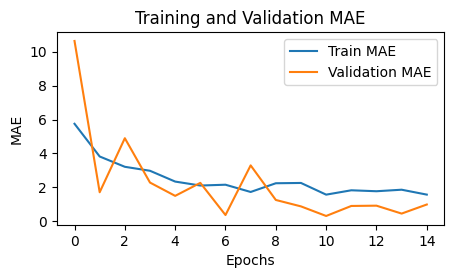

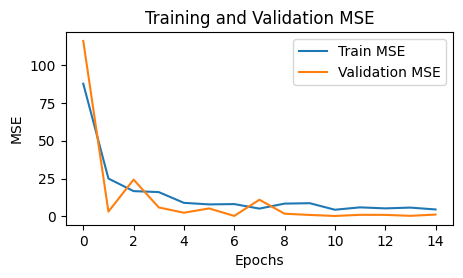

In [ ]:
# Gráficos de entrenamiento y validación
plt.figure(figsize=(5, 2.5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

plt.figure(figsize=(5, 2.5))
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.legend()
plt.show()

In [ ]:
# Último valor de MAE en entrenamiento
last_train_mae = history.history['mae'][-1]

# Último valor de MAE en validación
last_val_mae = history.history['val_mae'][-1]

print(f"Último MAE en entrenamiento: {last_train_mae}")
print(f"Último MAE en validación: {last_val_mae}")

Último MAE en entrenamiento: 1.5709688663482666
Último MAE en validación: 0.9877540469169617


In [ ]:
print("Rango de X_local:")
print("Mínimo:", X_local.min())
print("Máximo:", X_local.max())


Rango de X_local:
Mínimo: fgm_home     12.0
fg3m_home     0.0
oreb_home     0.0
ftm_home      0.0
ast_home      5.0
dtype: float64
Máximo: fgm_home     84.0
fg3m_home    28.0
oreb_home    44.0
ftm_home     61.0
ast_home     60.0
dtype: float64


In [ ]:
print("Rango de y_local:")
print("Mínimo:", y_local.min())
print("Máximo:", y_local.max())


Rango de y_local:
Mínimo: 36.0
Máximo: 192.0
